# Risk Analysis 
Christopher Bloome

Data 604 - Discussion 1 

In the last few weeks, with COVID-19 quarantine in full effect, my fiance and I have turned to board games as a way to pass the time. The war simulation game, Risk, has an interesting set of rules in place during its battle mechanic, resulting in a situation where it's not clear which side has the advantage. I wanted to model this to learn more about how this operates. 

Risk involves a series of "battles" over territories. There is an Offensive and Defense side in any given battle. The Offensive side is allowed to attack with 3 units, while the defensive team can only defend with 2. We represent these units by the roll of a traditional 6 sided die. The greatest valued unit (as determined by the dice roll) of each side "face off" so to speak, as do the second highest - neither side is allowed to adjust to a more favorable matchup. If the Offensive side of each pairing has a higher value, it captures the defensive unit. Similarly, this relationship holds true with the defensive side as well - if the defensive side of the pairing is greater than the offensive, the offensive unit is captured. What makes this interesting, if the pairing has equal values, the defensive team captures the offensive unit. 

A few notes: in turns where the Offensive Side attacks with 3 dice, the lowest value is essentially discarded. In other words - the Offensive side can only lose up to two units. Additionally, it's worth noting there are 3 potential outcomes, the Offensive side can capture two of the defensive, the Defensive unit can capture two of the Offensive, and one from each team can be captured. Finally, when a piece is captured - it is removed from play entirely - it does not "change teams."

For the sake of this model, we will run one thousand 3 vs 2 matchups with the above rules and view the aggregate units captured. 


In [52]:
# Import Packages
import random
from modsim import *

In [59]:
# Create State, and Results time series
Troops = State(Offense = 0, Defense = 0)
ResultsO = TimeSeries()
ResultsD = TimeSeries()

In [60]:
for i in range(1000):
    # Roll each die individually 
    O1 = random.randint(1,6)
    O2 = random.randint(1,6)
    O3 = random.randint(1,6)
    D1 = random.randint(1,6)
    D2 = random.randint(1,6)
    
    # put dice into lists with Offensive and Deffensive sides
    listO = [O1, O2, O3]
    listD = [D1, D2]
    
    # sort from highest to lowest value within side
    listO.sort(reverse = True)
    listD.sort(reverse = True)

    # simulate matchups 
    if(listO[0]>listD[0]):
        Troops.Offense += 1
    else:
        Troops.Defense += 1
        
    if(listO[1]>listD[1]):
        Troops.Offense += 1
    else:
        Troops.Defense += 1
    
    # drop outcomes in vector for time series analysis 
    ResultsO[i] = Troops.Offense
    ResultsD[i] = Troops.Defense


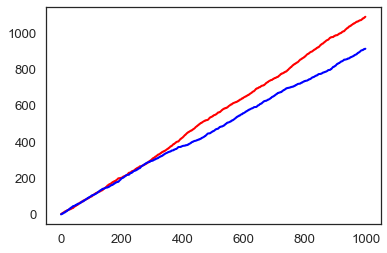

In [70]:
# plot Offensive captures in red and Deffensive in blue
plot(ResultsO, color = "red")
plot(ResultsD, color = "blue")